In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='lbfgs')
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sys

# Check for python version
req_version = (2,5)
cur_version = sys.version_info

In [4]:
mbti = pd.read_csv('data/mbti_1.csv')
print(mbti.head(10))
print("*"*80)
print(mbti.info())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB
None


In [5]:
#data has no nulls but is separated by ||| for each comment. 50 comments in each row.

In [6]:
mbti['words_per_comment'] = mbti['posts'].apply(lambda x: len(x.split())/50)
print(mbti.head())

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


In [7]:
#visualize data

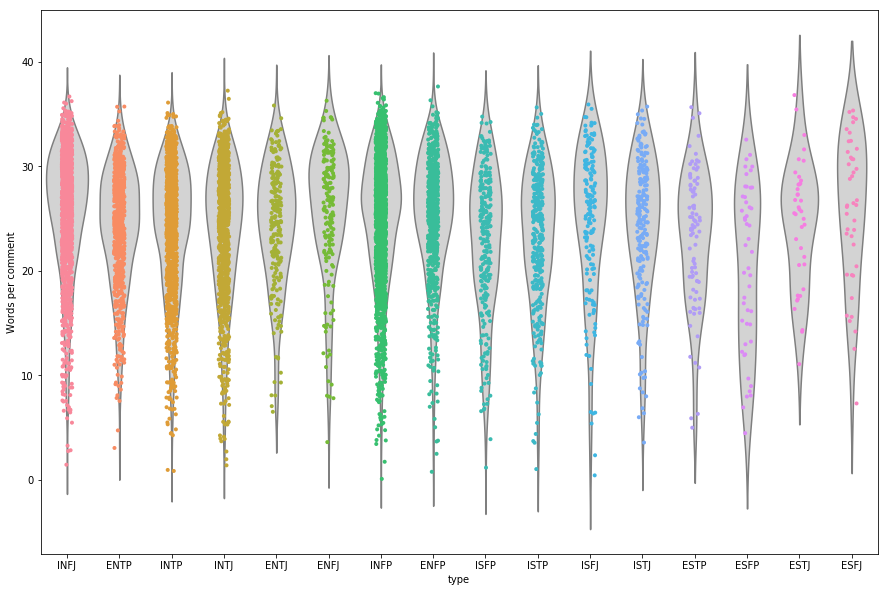

In [8]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=mbti, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=mbti, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

<Figure size 1080x720 with 0 Axes>

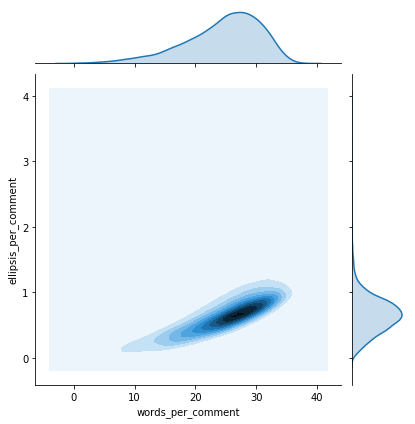

In [9]:
#check to see if there are any common themes in puncuation or references to other sites or music.

mbti['http_per_comment'] = mbti['posts'].apply(lambda x: x.count('http')/50)
mbti['music_per_comment'] = mbti['posts'].apply(lambda x: x.count('music')/50)
mbti['question_per_comment'] = mbti['posts'].apply(lambda x: x.count('?')/50)
mbti['img_per_comment'] = mbti['posts'].apply(lambda x: x.count('jpg')/50)
mbti['excl_per_comment'] = mbti['posts'].apply(lambda x: x.count('!')/50)
mbti['ellipsis_per_comment'] = mbti['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=mbti, kind='kde')

#something that crossed my mind is the ... may not include if people used .. or .... but I think it would include 6'.'
#don't know if that is very important. Maybe there is something else in the data to isolate as a feature.
#maybe explore more of these per comment features.

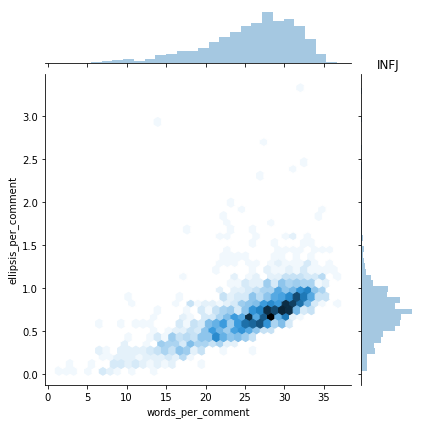

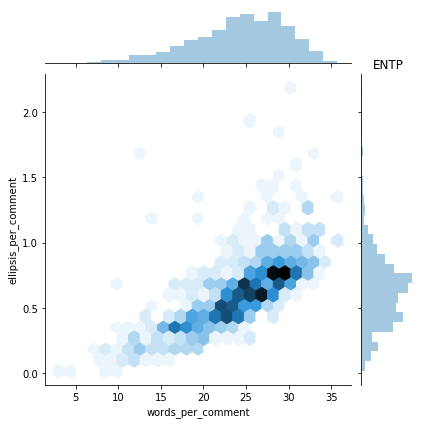

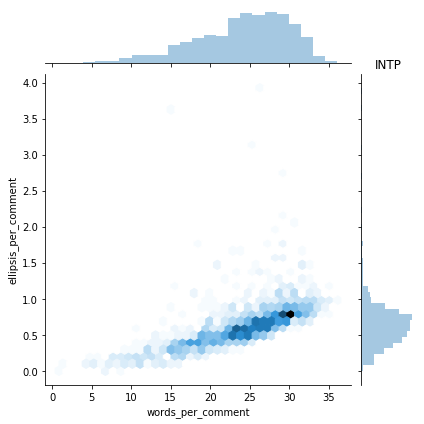

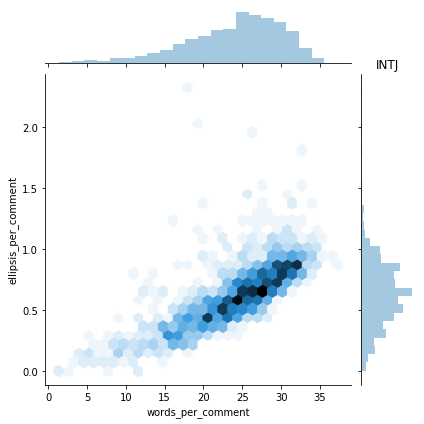

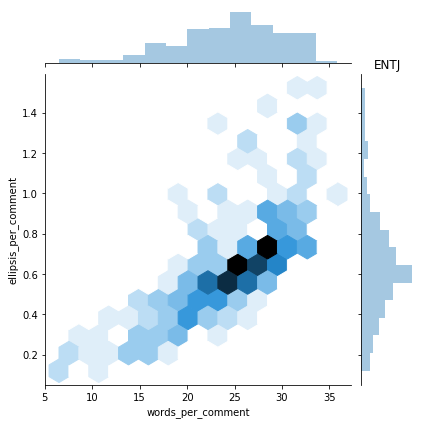

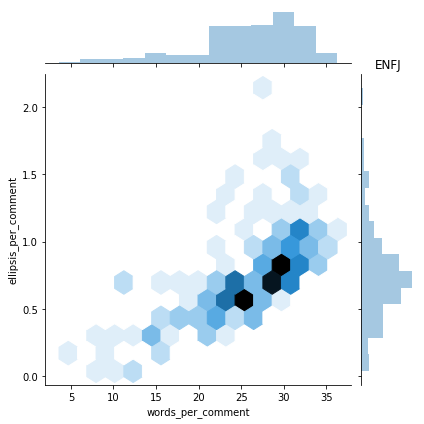

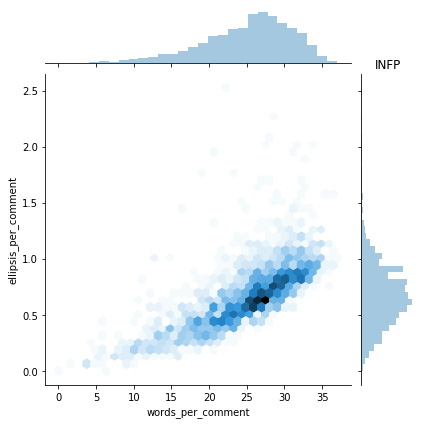

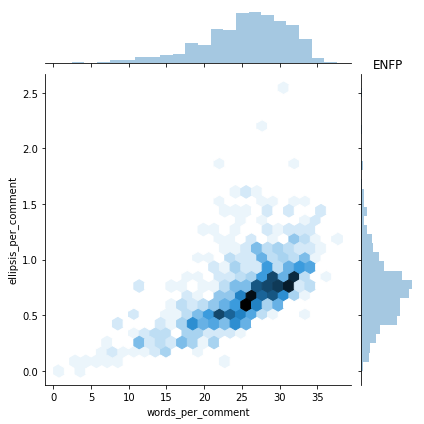

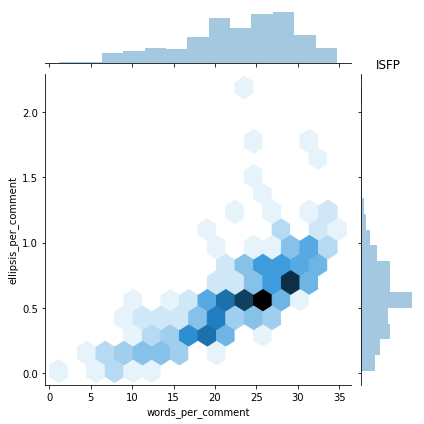

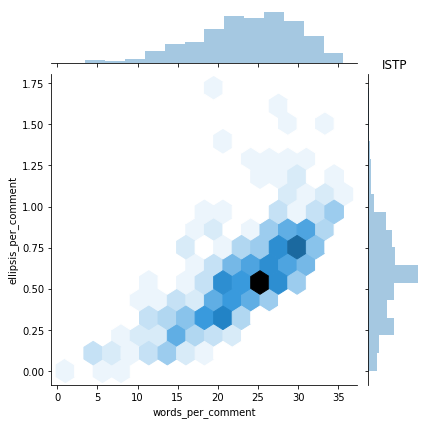

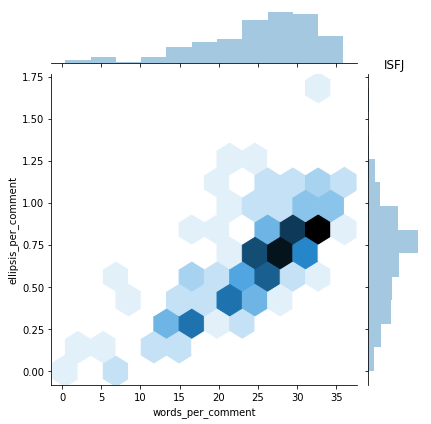

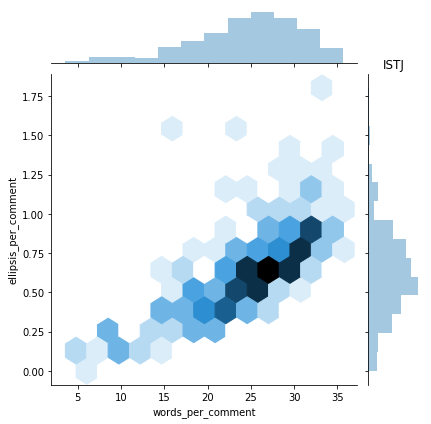

In [10]:
i = mbti['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        mbti_2 = mbti[mbti['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=mbti_2, kind="hex")
        plt.title(i[k])
        k+=1

In [11]:
#potentially getting rid of the ||| and setting a column for words per comment and the variance
#def var_row(row):
#    l = []
#    for i in row.split('|||'):
#        l.append(len(i.split()))
#    return np.var(l)

#df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
#df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
#df.head()

In [12]:
#I think it would be useful based on observations and the few kernals I observed on kaggle to separate each value of the 4
#letters to their own columns representing 0 and 1 I = 0 and E = 1....

map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
mbti['I_E'] = mbti['type'].astype(str).str[0]
mbti['Num_I_E'] = mbti['I_E'].map(map1)
mbti['N_S'] = mbti['type'].astype(str).str[1]
mbti['Num_N_S'] = mbti['N_S'].map(map2)
mbti['T_F'] = mbti['type'].astype(str).str[2]
mbti['Num_T_F'] = mbti['T_F'].map(map3)
mbti['J_P'] = mbti['type'].astype(str).str[3]
mbti['Num_J_P'] = mbti['J_P'].map(map4)
print(mbti.head(11))

    type                                              posts  \
0   INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1   ENTP  'I'm finding the lack of me in these posts ver...   
2   INTP  'Good one  _____   https://www.youtube.com/wat...   
3   INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4   ENTJ  'You're fired.|||That's another silly misconce...   
5   INTJ  '18/37 @.@|||Science  is not perfect. No scien...   
6   INFJ  'No, I can't draw on my own nails (haha). Thos...   
7   INTJ  'I tend to build up a collection of things on ...   
8   INFJ  I'm not sure, that's a good question. The dist...   
9   INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...   
10  INFJ  'One time my parents were fighting over my dad...   

    words_per_comment  http_per_comment  music_per_comment  \
0               11.12              0.48               0.02   
1               23.40              0.20               0.00   
2               16.72              0.10               0.0

## I_E Log Reg Simple Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=mbti['posts']
y= mbti['Num_I_E']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
vect = CountVectorizer()
train_mbti_I_E = vect.fit_transform(X_train)
test_mbti_I_E = vect.transform(X_test)
#Accuracy
logreg = LogisticRegression()
logreg.fit(train_mbti_I_E, y_train)
I_E_pred = logreg.predict(test_mbti_I_E)
print (metrics.accuracy_score(y_test, I_E_pred))

D:\Miniconda3\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8275703088981097


In [15]:
All_mbti_I_E = vect.transform(mbti.posts)
I_E_pred_all = logreg.predict(All_mbti_I_E)
I_E_pred_all

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
#create columns for comparison purposes later
mbti['Pred_Num_I_E'] = I_E_pred_all
mbti.Num_I_E.head()

0    0
1    1
2    0
3    0
4    1
Name: Num_I_E, dtype: int64

In [17]:
mbti['Pred_I_E'] = mbti['Pred_Num_I_E'].map(lambda x : 'I' if x <1 else 'E')
mbti.Pred_I_E.head()

0    I
1    E
2    I
3    I
4    E
Name: Pred_I_E, dtype: object

## I_E Null Accuracy

In [18]:
mbti.I_E.value_counts()

I    6676
E    1999
Name: I_E, dtype: int64

In [19]:
#null accuracy
6676/(6676+1999)

0.7695677233429394

## Pickle

In [20]:
import pickle

# store the I_E logreg to disk after training
with open('favoriteworld.pkl', 'wb') as fout:
    pickle.dump(logreg, fout)
    
## Save vocabulary
#ngram_size = 1
#vectorizer = CountVectorizer(ngram_range=(ngram_size, ngram_size), min_df=1)
#vect2 = vectorizer.fit(X_train.iloc[:, 0])
vect.fit(X_train)
dictionary_filepath = 'MBTI_Vocab.pkl'
pickle.dump(vect.vocabulary_, open(dictionary_filepath, 'wb'))

# I_E Cross Validation Score

In [21]:
print (cross_val_score(logreg, test_mbti_I_E, y_test, cv=2, scoring='accuracy').mean())

D:\Miniconda3\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8137368850647031


## N_S Simple Log Reg

In [22]:
y2= mbti['Num_N_S']
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=1)
train_mbti_N_S = vect.fit_transform(X_train)
test_mbti_N_S = vect.transform(X_test)
logreg.fit(train_mbti_N_S, y2_train)
N_S_pred = logreg.predict(test_mbti_N_S)
print (metrics.accuracy_score(y2_test, N_S_pred))

0.8911940986629784


In [23]:
All_mbti_N_S = vect.transform(mbti.posts)
N_S_pred_all = logreg.predict(All_mbti_N_S)
N_S_pred_all

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
#create columns for comparison purposes later
mbti['Pred_Num_N_S'] = N_S_pred_all
mbti.Num_N_S.head()

0    0
1    0
2    0
3    0
4    0
Name: Num_N_S, dtype: int64

In [25]:
mbti['Pred_N_S'] = mbti['Pred_Num_N_S'].map(lambda x : 'N' if x <1 else 'S')
mbti.Pred_N_S.head()

0    N
1    N
2    N
3    N
4    N
Name: Pred_N_S, dtype: object

In [26]:
mbti.N_S.value_counts()

N    7478
S    1197
Name: N_S, dtype: int64

In [27]:
#null accuracy
7478/(7478+1197)

0.8620172910662824

In [28]:
with open('information.pkl', 'wb') as fout:
    pickle.dump(logreg, fout)

## Cross Validation Score

In [29]:
print (cross_val_score(logreg, test_mbti_N_S, y2_test, cv=2, scoring='accuracy').mean())

D:\Miniconda3\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.887047885455813


## T_F Simple Log Reg

In [30]:
y3= mbti['Num_T_F']
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=1)
train_mbti_T_F = vect.fit_transform(X_train)
test_mbti_T_F = vect.transform(X_test)
logreg.fit(train_mbti_T_F, y3_train)
T_F_pred = logreg.predict(test_mbti_T_F)
print (metrics.accuracy_score(y3_test, T_F_pred))

0.8284923928077456


In [31]:
All_mbti_T_F = vect.transform(mbti.posts)
T_F_pred_all = logreg.predict(All_mbti_T_F)
T_F_pred_all

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
#create columns for comparison purposes later
mbti['Pred_Num_T_F'] = T_F_pred_all
mbti.Num_T_F.head()

0    1
1    0
2    0
3    0
4    0
Name: Num_T_F, dtype: int64

In [33]:
mbti['Pred_T_F'] = mbti['Pred_Num_T_F'].map(lambda x : 'T' if x <1 else 'F')
mbti.Pred_T_F.head()

0    F
1    T
2    T
3    T
4    T
Name: Pred_T_F, dtype: object

In [34]:
mbti.T_F.value_counts()

F    4694
T    3981
Name: T_F, dtype: int64

In [35]:
#null accuracy
4694/(4694+3981)

0.5410951008645534

In [36]:
with open('decision.pkl', 'wb') as fout:
    pickle.dump(logreg, fout)

# T_F Cross Validation

In [37]:
print (cross_val_score(logreg, test_mbti_T_F, y3_test, cv=2, scoring='accuracy').mean())

D:\Miniconda3\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.810048973761627


## J_P Simple Log Reg

In [38]:
y4= mbti['Num_J_P']
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, random_state=1)
train_mbti_J_P = vect.fit_transform(X_train)
test_mbti_J_P = vect.transform(X_test)
logreg.fit(train_mbti_T_F, y4_train)
J_P_pred = logreg.predict(test_mbti_J_P)
print (metrics.accuracy_score(y4_test, J_P_pred))

0.7657906869525127


In [39]:
All_mbti_J_P = vect.transform(mbti.posts)
J_P_pred_all = logreg.predict(All_mbti_J_P)
J_P_pred_all

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
#create columns for comparison purposes later
mbti['Pred_Num_J_P'] = J_P_pred_all
mbti.Num_J_P.head()

0    0
1    1
2    1
3    0
4    0
Name: Num_J_P, dtype: int64

In [41]:
mbti['Pred_J_P'] = mbti['Pred_Num_J_P'].map(lambda x : 'J' if x <1 else 'P')
mbti.Pred_J_P.head()

0    J
1    P
2    P
3    J
4    J
Name: Pred_J_P, dtype: object

In [42]:
mbti.J_P.value_counts()

P    5241
J    3434
Name: J_P, dtype: int64

In [43]:
#null accuracy
5241/(5241+3434)

0.604149855907781

In [44]:
with open('structure.pkl', 'wb') as fout:
    pickle.dump(logreg, fout)

# J_P Cross Validation

In [45]:
print (cross_val_score(logreg, test_mbti_J_P, y4_test, cv=2, scoring='accuracy').mean())

D:\Miniconda3\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7219935551890081


# Create a column with predictions then compare to the original values

In [46]:
mbti['predict_type'] = mbti.Pred_I_E + mbti.Pred_N_S + mbti.Pred_T_F + mbti.Pred_J_P
mbti.predict_type.head()

0    INFJ
1    ENTP
2    INTP
3    INTJ
4    ENTJ
Name: predict_type, dtype: object

In [47]:
#mbti['total_accuracy'] = 1 if mbti.I_E == mbti.Num_I_E & mbti.N_S == mbti.Num_N_S & mbti.T_F == mbti.Num_T_F & mbti.J_P == mbti.Num_J_P else 0
#it doesn't like the columns set equal to each other. refered to use np.logical but its literally just copying predict_typea
#mbti['total_accuracy'] = np.logical_and (mbti.predict_type,mbti.type,where=True)
#mbti.total_accuracy.head()

## Button/Text Box Exploring

In [48]:
from ipywidgets import interact, widgets, Button, Layout, Text
from IPython.display import display

text = widgets.Text(
    value='Paste Comment(s) here!',
    placeholder='Paste Comment(s) here!',
    description='Comment:',
    disabled=False,
    layout=Layout(width='75%', height='80px')
)
display(text)

style = {'description_width': 'initial'}

text2 = widgets.Text(
    value='callback',
    placeholder='Personality Indicator',
    description='MBTI Indicator:',
    disabled=False,
    style=style,
    layout=Layout(width='75%', height='80px')
)
display(text2)


def callback(wdgt):
    #display(wdgt.value) 
    comment = text.value
    mbti_predict(comment)
    text2.value = mbti_predict(comment)
    
    
text.on_submit(callback)

Text(value='Paste Comment(s) here!', description='Comment:', layout=Layout(height='80px', width='75%'), placeh…

Text(value='callback', description='MBTI Indicator:', layout=Layout(height='80px', width='75%'), placeholder='…

In [49]:
text.value

'Paste Comment(s) here!'

In [50]:
comment

NameError: name 'comment' is not defined

In [ ]:
#from ipywidgets import Button, Layout, Text
#this code is to import a button to submit. I found a solution to press enter in a box that is more streamlined.
#b = Button(description='Submit',
#           layout=Layout(width='50%', height='80px'))
#b

In [ ]:
comment = mbti.loc[87,'posts']
#for reference and experimentation
#row 87 ISFJ - predicts ISFJ
#row 99 ENFP - predicts ENTP
#row 85 INTP

In [ ]:
mbti.loc[87,'type']

# Call the pickled models locally, analyze an input, and return Personality Indicators

In [ ]:
import random

def get_favorite_world(comment):
    L1 = ['I', 'E']
    vocab = pickle.load(open('MBTI_Vocab.pkl', 'rb'))
    loaded_vectorizer = CountVectorizer(vocabulary=vocab)
    loaded_vectorizer._validate_vocabulary()
    logregfw = pickle.load(open('favoriteworld.pkl', 'rb'))
    X = comment
    array = loaded_vectorizer.fit_transform([X]).toarray()
    favoriteworld = logregfw.predict(array)
    return "I" if favoriteworld.tolist().pop()==0 else "E"
    
def get_information(comment):
    L2  = ['N', 'S']
    vocab = pickle.load(open('MBTI_Vocab.pkl', 'rb'))
    loaded_vectorizer = CountVectorizer(vocabulary=vocab)
    loaded_vectorizer._validate_vocabulary()
    logreginfo = pickle.load(open('information.pkl', 'rb'))
    X = comment
    array = loaded_vectorizer.fit_transform([X]).toarray()
    information = logreginfo.predict(array)
    return "N" if information.tolist().pop()==0 else "S"

def get_decision(comment):
    L3  = ['T', 'F']
    vocab = pickle.load(open('MBTI_Vocab.pkl', 'rb'))
    loaded_vectorizer = CountVectorizer(vocabulary=vocab)
    loaded_vectorizer._validate_vocabulary()
    logregdecision = pickle.load(open('decision.pkl', 'rb'))
    X = comment
    array = loaded_vectorizer.fit_transform([X]).toarray()
    decision = logregdecision.predict(array)
    return "T" if decision.tolist().pop()==0 else "F"

def get_structure(comment):
    L4  = ['J', 'P']
    vocab = pickle.load(open('MBTI_Vocab.pkl', 'rb'))
    loaded_vectorizer = CountVectorizer(vocabulary=vocab)
    loaded_vectorizer._validate_vocabulary()
    logregstructure = pickle.load(open('structure.pkl', 'rb'))
    X = comment
    array = loaded_vectorizer.fit_transform([X]).toarray()
    structure = logregstructure.predict(array)
    return "J" if structure.tolist().pop()==0 else "P"

def mbti_predict(comment):
    indicator_1 = get_favorite_world(comment)
    indicator_2 = get_information(comment)
    indicator_3 = get_decision(comment)
    indicator_4 = get_structure(comment)

    macro_indicator = "{0}{1}{2}{3}".format(indicator_1, indicator_2, indicator_3, indicator_4)
    return macro_indicator

import urllib
from urllib.request import urlopen
import json

def classify_MBTI(comment):
   url = "http://127.0.0.1:10015/mbti?comment={0}".format(comment)
   response = urllib.request.urlopen(url)
   data = json.load(response)
   response.close()
   return data["MBTI"]

macro_indicator = mbti_predict(comment)
print (macro_indicator)

In [ ]:
#Test MBTI_predict
mbti_predict(comment)

In [ ]:
#Test Macro Indicator
macro_indicator

# Iterate to a better Model by creating a function to run models

In [ ]:
#Setup a  series of models & names to refer to later to automate running multiple algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

names = ["Logistic Regression", 
         #"Decision Tree", "Nearest Neighbors", 
         #"Random Forest", 
         "KMeans Clustering","Naive Bayes","AdaBoost"]
models = [

   LogisticRegression(),

   #DecisionTreeRegressor(max_depth = 6, random_state = 1),

   #KNeighborsRegressor(n_neighbors = 6),

    #RandomForestRegressor(),
    
    KMeans(n_clusters=2, n_init=1, random_state=1),
    
    MultinomialNB(),

    AdaBoostClassifier()]

feature_cols = ['posts']

# I_E

In [ ]:
def executeModel_I_E(model, features):
    # Assign X, y, etc. based on features

    # train
    model.fit(train_mbti_I_E, y_train)
    # predict
    y_pred = model.predict(test_mbti_I_E)
    # measure
    #metrics.r2_score(y_test, y_pred)
    return(metrics.accuracy_score(y_test, y_pred))

In [ ]:
for modelName, model in zip(names, models):
    print(modelName, executeModel_I_E(model, feature_cols))

# N_S

In [ ]:
def executeModel_N_S(model, features):
    model.fit(train_mbti_N_S, y2_train)
    y2_pred = model.predict(test_mbti_N_S)
    return(metrics.accuracy_score(y2_test, y2_pred))

In [ ]:
for modelName, model in zip(names, models):
    print(modelName, executeModel_N_S(model, feature_cols))

# T_F

In [ ]:
def executeModel_T_F(model, features):
    model.fit(train_mbti_T_F, y3_train)
    y3_pred = model.predict(test_mbti_T_F)
    return(metrics.accuracy_score(y3_test, y3_pred))

In [ ]:
for modelName, model in zip(names, models):
    print(modelName, executeModel_T_F(model, feature_cols))

# J_P

In [ ]:
def executeModel_J_P(model, features):
    model.fit(train_mbti_J_P, y4_train)
    y4_pred = model.predict(test_mbti_J_P)
    return(metrics.accuracy_score(y4_test, y4_pred))

In [ ]:
for modelName, model in zip(names, models):
    print(modelName, executeModel_J_P(model, feature_cols))

## Flask

In [ ]:
#from flask import Flask

## To CSV for PowerBI

In [ ]:
#mbti.to_csv('D:\Divergence\Project\mbti.csv')

# Employ NLP Techniques to Improve Model

In [ ]:
#from nltk.corpus import stopwords
#from nltk.tokenize import wordpunct_tokenize

# Unsupervised Learning